**This is a heart disease prediction project**

* Problem Defination
* data
* evaluation
* Features
* Modeling
* Experimentation

In [6]:
#Standard Libs
%matplotlib inline 
#<to show the plot in this learning notebook file as well (inline)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Modeling Libs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation Libs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Data

In [7]:
df = pd.read_csv(r'C:\Users\Dharun prasanth\OneDrive\Documents\Project\Notebook\data\heart.csv')
df.shape

(1025, 14)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### Features
What features are important, what column means what

* 1-age (Age of the patient in years)
* 2-sex (Male/Female) (1/0)
* 3-cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])(0~3)
* 4-trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)) 
* 5-chol (serum cholesterol in mg/dl)
* 6-fbs (if fasting blood sugar > 120 mg/dl) (1/0)
* 7-restecg (resting electrocardiographic results)-- Values: [normal, stt abnormality, lv hypertrophy] (0~2)
* 8-thalach: maximum heart rate achieved 
* 9-exang: exercise-induced angina (True/ False) (1/0)
* 10-oldpeak: ST depression induced by exercise relative to rest
* 11-slope: the slope of the peak exercise ST segment  (downsloping/flat/upsloping)
* 12-ca: number of major vessels (0-3) colored by fluoroscopy
* 13-thal: [normal; fixed defect; reversible defect] (1~3)
* 14-target: yes or no (1/0)

# Exploratory Data Analysis

* 1- What Problem i am going to solve
* 2- What kind of data i have
* 3- Does this data have missing values
* 4- Are their any outliers, spporious vectors
* 5- Can i add or remove some features

In [10]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

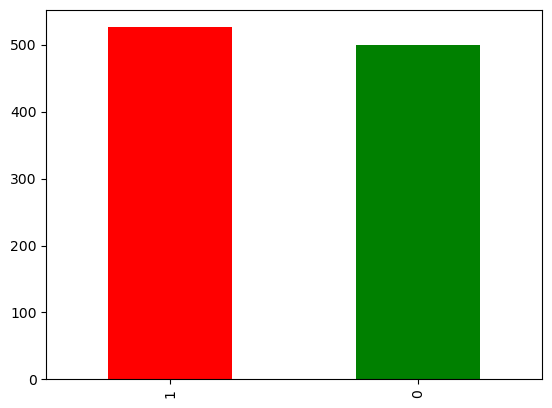

In [11]:
df.target.value_counts().plot(kind='bar',color=['red','green']);

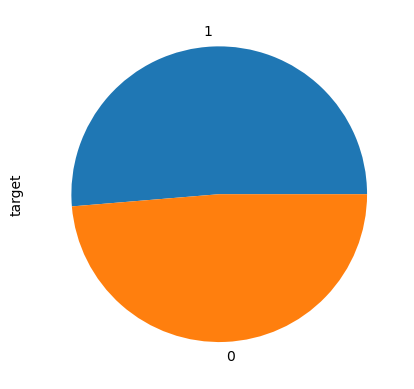

In [12]:
df.target.value_counts().plot(kind='pie');

In [13]:
# is there any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [16]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,86,226
1,413,300


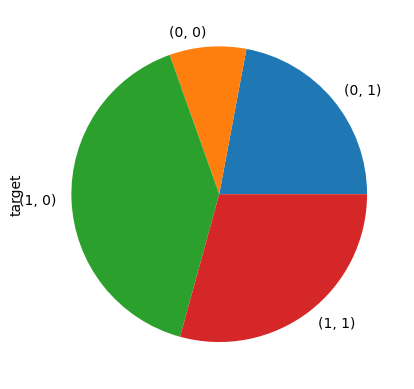

In [17]:
df.groupby(["sex"])["target"].value_counts().plot(kind="pie");

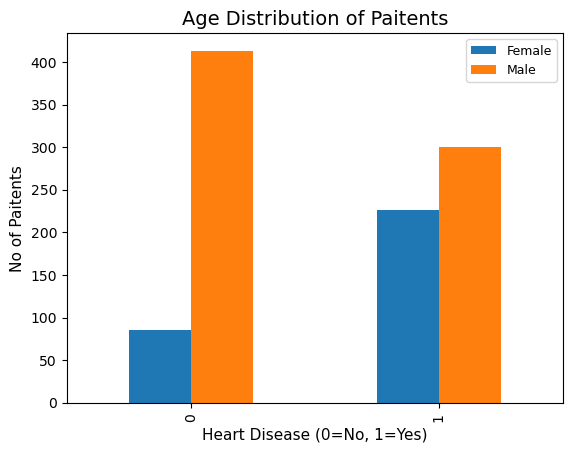

In [18]:
pd.crosstab(df.target, df.sex).plot(kind='bar');
plt.xlabel('Heart Disease (0=No, 1=Yes)', fontsize = 11)
plt.ylabel('No of Paitents', fontsize = 11)
plt.title('Age Distribution of Paitents', fontsize = 14)
plt.legend(['Female','Male'], fontsize = 9);

### Age vs Heart Rate

In [19]:
df.thalach.value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

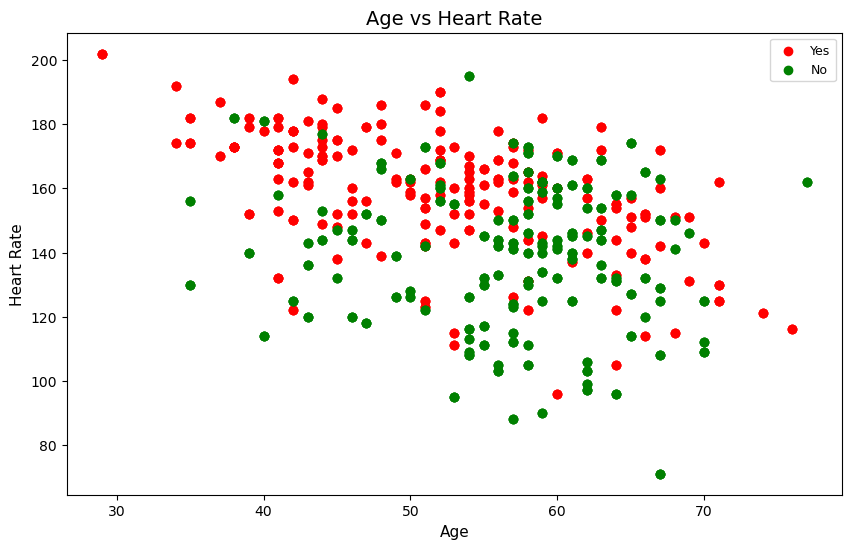

In [20]:
# Finding pattern using scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c='green')
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Heart Rate', fontsize = 11)
plt.title('Age vs Heart Rate', fontsize = 14)
plt.legend(['Yes','No'], fontsize = 9);

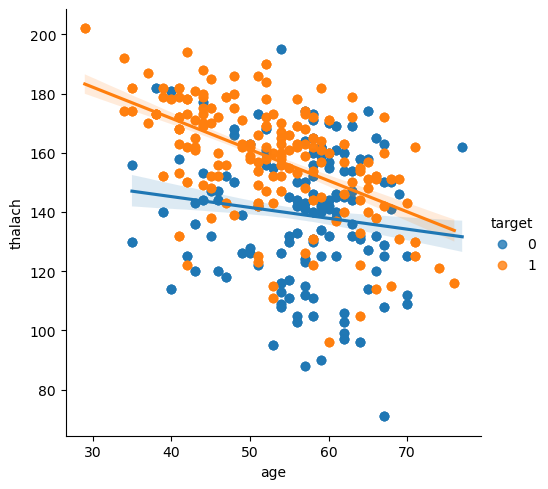

In [21]:
# alternately use this to see pattern
sns.lmplot(data=df, x='age', y='thalach', hue='target');

### Age Distribution

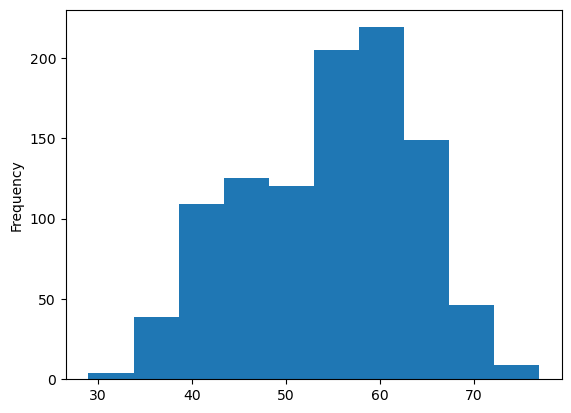

In [22]:
# Create histogram to see age distribution
df.age.plot.hist();

data is sligtly skewed toward high age

### Chest paint type and Target relation

In [23]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])(0~3)

In [24]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


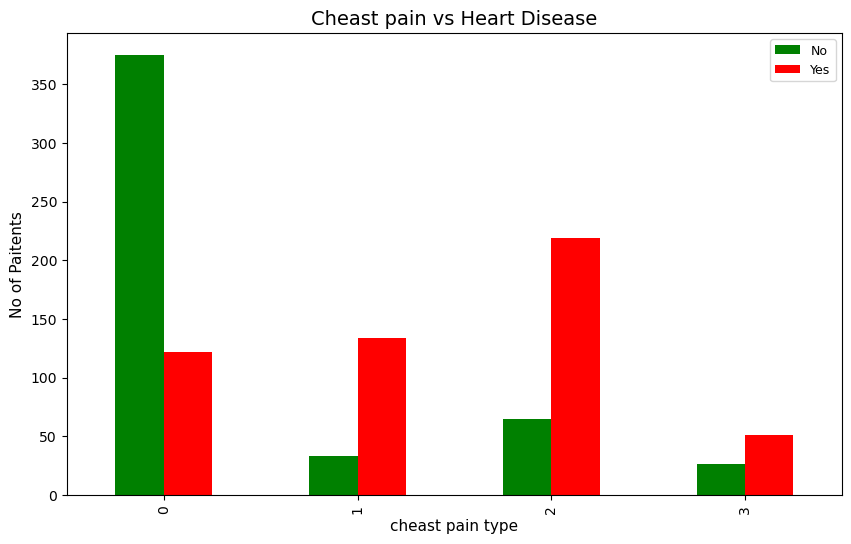

In [25]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['green', 'red']);
plt.xlabel('cheast pain type', fontsize = 11)
plt.ylabel('No of Paitents', fontsize = 11)
plt.title('Cheast pain vs Heart Disease', fontsize = 14)
plt.legend(['No','Yes'], fontsize = 9);

### Correlation Matrix

In [26]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


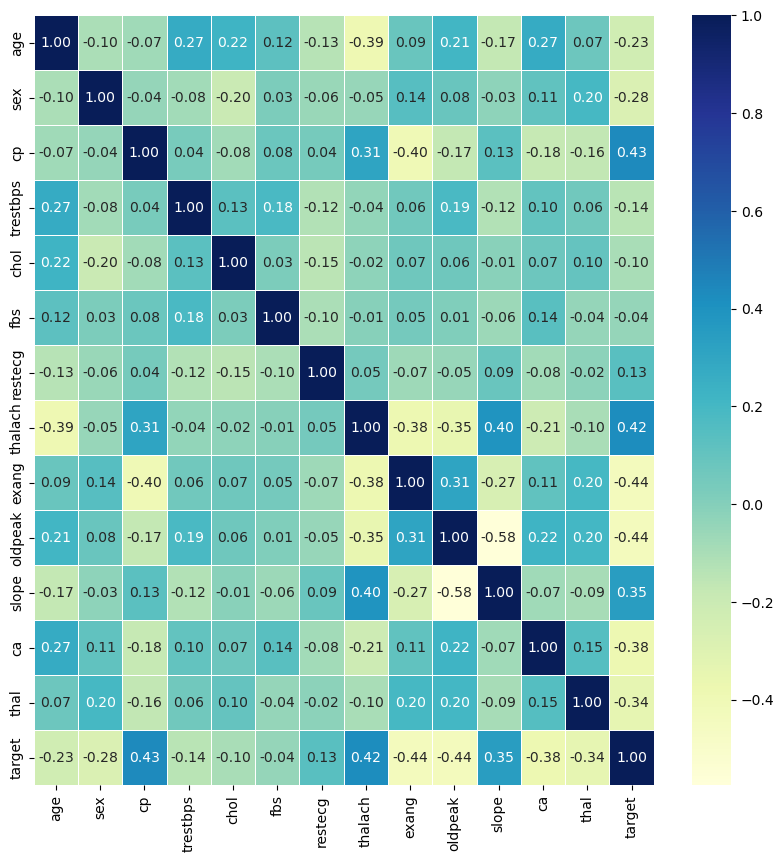

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, linewidth=0.5, fmt='0.2f', cmap='YlGnBu');

# Modelling 

In [28]:
# Split data in Features and Label
X = df.drop('target', axis=1)
y = df.target

In [29]:
# split data in respective test and train veriables
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Choosing Model
* 1- KNeighborsClassifier
* 2- RandomForestClassifier
* 3- LogisticRegression

In [30]:
# create model dictionary
models = {'KNN': KNeighborsClassifier(),
          'RFC': RandomForestClassifier(random_state=0),
          'LR' : LogisticRegression(random_state=0)}
# Create function to evaluate score
def fit_and_score(models, X_train, X_test , y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [31]:
model_score = fit_and_score(models=models, X_train=X_train, X_test=X_test , y_train=y_train , y_test=y_test)
model_score

c:\Users\Dharun prasanth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Dharun prasanth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

{'KNN': 0.7463414634146341, 'RFC': 1.0, 'LR': 0.8634146341463415}

RFC show 100% score, which is not acceptable

<AxesSubplot:>

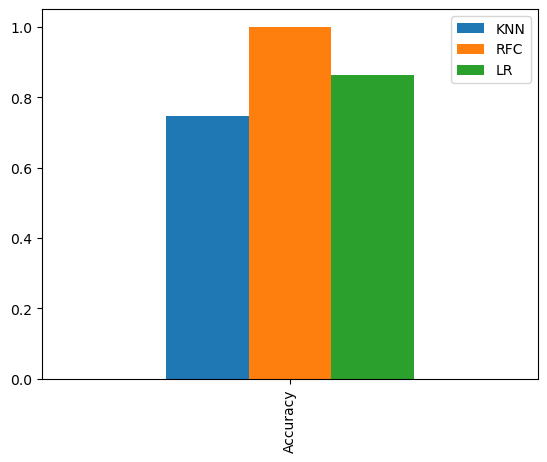

In [32]:
# lets see graphically
model_compare = pd.DataFrame(model_score, index = ['Accuracy'])
model_compare.plot.bar()

### Improving Model
**Universal methods used**
* hyperparameters
* Features improving

**Advance Methods**
* confusion matrix
* Cross validation
* Precision
* Recall
* F1
* Classification report
* ROC curve

In [33]:
KNN = KNeighborsClassifier()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [34]:
# tuning n_neighbors
train_score = []
test_score = []
# create range for n_neighbors
kn = range(5,30)
# looping KNN instance through range
for i in kn:
    KNN.set_params(n_neighbors = i)
    # Fit
    KNN.fit(X_train,y_train)
    # update scores lists
    train_score.append(KNN.score(X_train,y_train))
    test_score.append(KNN.score(X_test,y_test))

c:\Users\Dharun prasanth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Dharun prasanth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

Max KNN accuracy 79.512195%


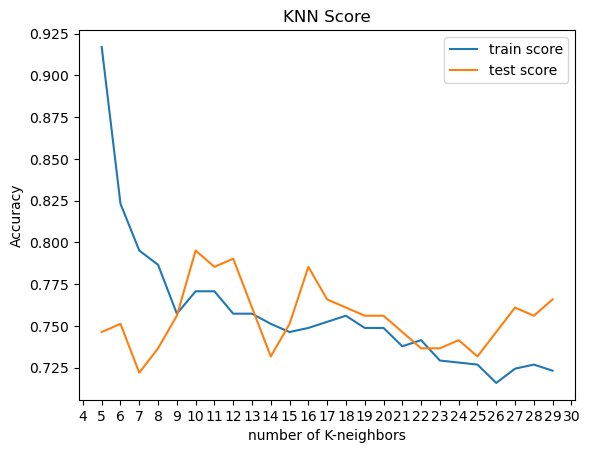

In [35]:
plt.plot(kn, train_score, label='train score')
plt.plot(kn, test_score, label='test score')
plt.xticks(np.arange(4,31,1))
plt.xlabel('number of K-neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Score')
plt.legend();
print(f'Max KNN accuracy {max(test_score)*100:2f}%')

### Hyperparameter Tunning using RSCV

In [36]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
LR_hp = {'C': np.logspace(-4,4,20),
         'solver': ['liblinear', 'lbfgs']}

RFC_hp = {'n_estimators': np.arange(10,1600,100),
          'max_depth': [None, 3,5,6,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

In [39]:
# Tuning LR
lr = RandomizedSearchCV(LogisticRegression(random_state=0),
                        param_distributions = LR_hp,
                        cv = 5,
                        n_iter = 20,
                        verbose = True)
# Fit
lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Dharun prasanth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dharun prasanth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [40]:
lr.score(X_test,y_test)

0.8682926829268293

In [41]:
# best parameters
lr.best_params_

{'solver': 'lbfgs', 'C': 545.5594781168514}

In [42]:
# Tuning RFC
rfc = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                        param_distributions = RFC_hp,
                        cv = 5,
                        n_iter = 20,
                        verbose = True)
# Fit
rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
rfc.score(X_test,y_test)

0.9951219512195122

In [ ]:
rfc.best_params_

{'n_estimators': 310,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 10}

### Hyperparameter Tunning using GSCV

In [ ]:
# Tuning LR
lr_gs = GridSearchCV(LogisticRegression(random_state=0),
                        param_grid = LR_hp,
                        cv = 5,
                        verbose = True)
# Fit
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [ ]:
lr_gs.score(X_test,y_test)

0.8585365853658536

In [ ]:
lr_gs.best_params_

{'C': 4.281332398719396, 'solver': 'lbfgs'}

In [ ]:
# Tuning RFC
RFC_hp2 = { 'n_estimators': [510,610],
            'max_depth': [None,10],
            'min_samples_split': [10,12],
            'min_samples_leaf': [1,2]}

rfc_gs = GridSearchCV(RandomForestClassifier(random_state=0),
                        param_grid = RFC_hp2,
                        cv = 5,
                        verbose = True)
# Fit
rfc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 12],
                         'n_estimators': [510, 610]},
             verbose=True)

In [ ]:
rfc_gs.score(X_test,y_test)

1.0

In [ ]:
rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 510}

#### Advance Methods for improving model
* confusion matrix
* roc curve

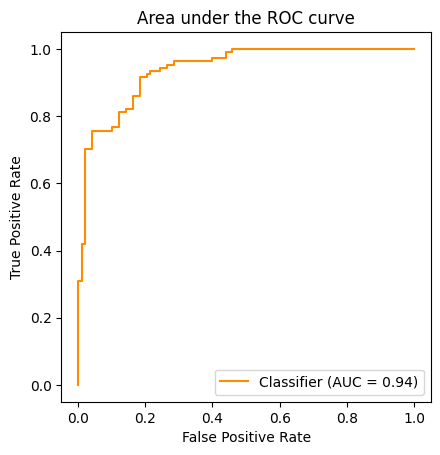

In [ ]:
# Plot Area under the curve for lr_gs model
lrgs_predict = lr_gs.predict(X_test)
lrgs_predict_proba = lr_gs.predict_proba(X_test)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test,
    lrgs_predict_proba[:, 1],
    color="darkorange")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area under the ROC curve")
plt.legend()
plt.show()

In [ ]:
# confusion matrix
print(confusion_matrix(y_test,lrgs_predict))

[[77 21]
 [ 8 99]]


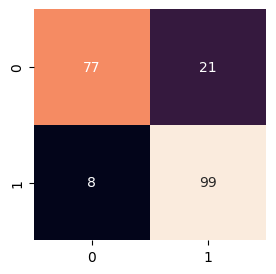

In [ ]:
def plot_confusion(y_test,lrgs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,lrgs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y_test,lrgs_predict)

In [ ]:
# Classifican report
print(classification_report(y_test,lrgs_predict))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84        98
           1       0.82      0.93      0.87       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [ ]:
lr.best_params_

{'solver': 'lbfgs', 'C': 3792.690190732246}

In [ ]:
# cross validation accuracy
lr_new = LogisticRegression(solver= 'lbfgs', C= 3792.690190732246, random_state=0)

cv_accuracy = cross_val_score(lr_new, X, y, cv=7, scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.848716003035265

In [ ]:
# cross validation precision
cv_precision = cross_val_score(lr_new, X, y, cv=7, scoring = 'precision')
cv_precision = cv_precision.mean()
cv_precision

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8204900001990465

In [ ]:
# cross validation recall

cv_recall = cross_val_score(lr_new, X, y, cv=7, scoring = 'recall')
cv_recall = cv_recall.mean()
cv_recall

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9030325814536342

In [ ]:
# cross validation f1

cv_f1 = cross_val_score(lr_new, X, y, cv=7, scoring = 'f1')
cv_f1 = cv_f1.mean()
cv_f1

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.859518726491931

### Visualize cross validated metrices

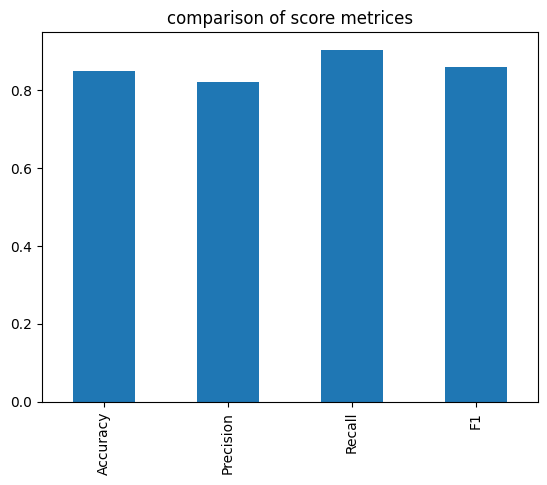

In [ ]:
cv_plot = pd.DataFrame({'Accuracy': cv_accuracy,
                       'Precision': cv_precision,
                       'Recall': cv_recall,
                       'F1': cv_f1}, index=[0])
cv_plot.T.plot.bar(title='comparison of score metrices',
                 legend=False);

# Features Improvement

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Check Coefficient
lr_new.fit(X_train,y_train)
lr_new.coef_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.0069268 , -1.82064295,  0.81024985, -0.01122751, -0.00424276,
        -0.0952246 ,  0.67504411,  0.031379  , -0.93116309, -0.60100964,
         0.42910411, -0.6801045 , -0.78629208]])

In [ ]:
final_coef = dict(zip(df.columns, list(lr_new.coef_[0])))
final_coef

{'age': 0.006926796412542527,
 'sex': -1.8206429512847702,
 'cp': 0.810249852404548,
 'trestbps': -0.011227506029277417,
 'chol': -0.004242757133465681,
 'fbs': -0.09522459519155144,
 'restecg': 0.6750441089822973,
 'thalach': 0.03137900155417829,
 'exang': -0.9311630910956502,
 'oldpeak': -0.6010096437562398,
 'slope': 0.42910410767637,
 'ca': -0.6801044950210797,
 'thal': -0.7862920789343734}

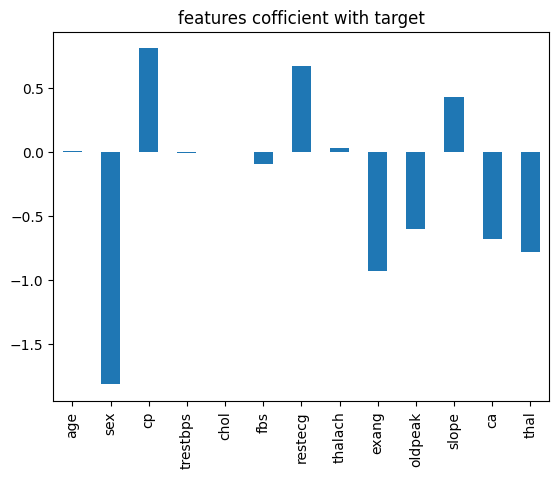

In [ ]:
features = pd.DataFrame(final_coef, index=[0])
features.T.plot.bar(title='features cofficient with target',legend=False);

<Axes: >

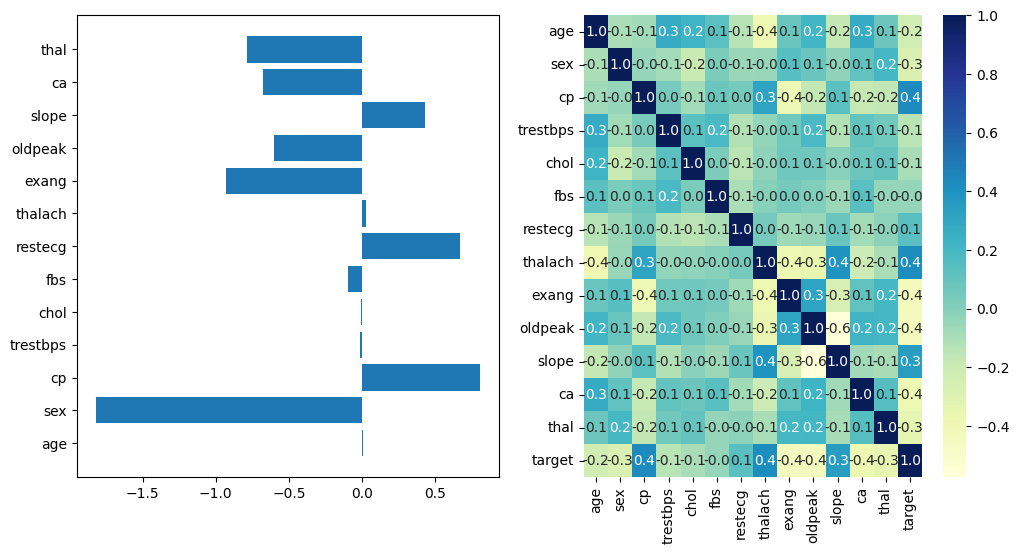

In [ ]:
fig, (sub_plot1,sub_plot2) = plt.subplots(nrows=1,ncols=2, figsize=(12,6))
sub_plot1.barh(list(final_coef.keys()),list(final_coef.values()));
sns.heatmap(df.corr(), annot=True, fmt='0.1f', cmap='YlGnBu', ax=sub_plot2)

## Conclusion
* we set 95% accuracy goal,
* do we need more data
* can we try to improve quality of data
* can we try other models for improvement